# data.csv에 대해 DL 적용

In [1]:
import pandas as pd
data = pd.read_csv("data.csv")
print( data.columns )

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data.drop('Pass.Fail', axis=1), data["Pass.Fail"], test_size=0.2)
scaler = MinMaxScaler()
X_train = pd.DataFrame( scaler.fit_transform( X_train), columns = X_train.columns )
X_test = pd.DataFrame( scaler.fit_transform( X_test), columns = X_test.columns )

Index(['X20', 'X86', 'X87', 'X88', 'X113', 'X115', 'X116', 'X117', 'X119',
       'X120', 'X156', 'X221', 'X222', 'X223', 'X248', 'X250', 'X251', 'X252',
       'X254', 'X255', 'X291', 'X359', 'X360', 'X361', 'X386', 'X388', 'X389',
       'X390', 'X392', 'X393', 'X429', 'X493', 'X494', 'X495', 'X520', 'X522',
       'X523', 'X524', 'X526', 'X527', 'X570', 'X571', 'X572', 'X573', 'X574',
       'X575', 'X576', 'X577', 'Pass.Fail'],
      dtype='object')


In [2]:
X_train

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X526,X527,X570,X571,X572,X573,X574,X575,X576,X577
0,0.826818,0.625240,0.989478,0.288321,0.672091,0.420713,0.979492,0.023681,0.900424,0.484203,...,0.178945,0.297583,0.774810,0.769397,0.008758,0.107840,0.009734,0.120068,0.008406,0.087857
1,0.825722,0.708946,0.973468,0.379181,0.734744,0.342789,0.992188,0.017584,0.967514,0.506072,...,0.046059,0.514730,0.805894,0.811971,0.005144,0.112864,0.006401,0.119879,0.004773,0.088425
2,0.819510,0.746006,0.947392,0.220264,0.772986,0.648518,0.973633,0.018612,0.859463,0.571596,...,0.338246,0.336287,0.805150,0.244643,0.007782,0.023427,0.008857,0.024279,0.007248,0.039863
3,0.862258,0.417572,0.965691,0.381734,0.868999,0.644721,0.984375,0.026223,0.982345,0.542214,...,0.022631,0.489180,0.795776,0.767578,0.013525,0.095728,0.013187,0.129552,0.012723,0.076093
4,0.903544,0.524281,0.973010,0.362590,0.708706,0.739154,0.970703,0.022874,0.890537,0.468511,...,0.156052,0.121584,0.780172,0.597851,0.005033,0.129953,0.006230,0.131829,0.004828,0.133392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,0.886372,0.413738,0.986276,0.291190,0.675346,0.580205,0.983398,0.023181,0.853107,0.507992,...,0.145123,0.165232,0.791553,0.423634,0.007760,0.085399,0.008741,0.116844,0.007330,0.106377
1249,0.857874,0.404473,0.897530,0.420965,0.768104,0.655213,0.982422,0.024139,0.847458,0.559493,...,0.254917,0.272872,0.798012,0.819133,0.014611,0.082817,0.015140,0.114378,0.013721,0.059072
1250,0.886372,0.507029,0.979872,0.449844,0.663954,0.731057,0.708008,0.016036,0.956215,0.581946,...,0.041889,0.337322,0.785787,0.602171,0.010088,0.094413,0.009501,0.103376,0.009574,0.092537
1251,0.770552,0.311182,0.985361,0.442124,0.706265,0.777562,0.984375,0.021557,0.891949,0.456826,...,0.239456,0.369298,0.788798,0.720230,0.012172,0.132629,0.011251,0.149848,0.011517,0.118598


In [3]:
# 타겟변수를 One-hot 형식으로 변환하기
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

y_train.shape

(1253, 2)

In [4]:
# 모델 정의하기 --- (*3)
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(48,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=20,
    verbose=1,
    validation_split=0.1)



Epoch 1/20
36/36 [==============================] - 5s 23ms/step - loss: 0.3935 - accuracy: 0.9317 - val_loss: 0.1978 - val_accuracy: 0.9603
Epoch 2/20
36/36 [==============================] - 0s 10ms/step - loss: 0.2507 - accuracy: 0.9317 - val_loss: 0.1704 - val_accuracy: 0.9603
Epoch 3/20
36/36 [==============================] - 0s 5ms/step - loss: 0.2481 - accuracy: 0.9317 - val_loss: 0.1755 - val_accuracy: 0.9603
Epoch 4/20
36/36 [==============================] - 0s 8ms/step - loss: 0.2492 - accuracy: 0.9317 - val_loss: 0.1738 - val_accuracy: 0.9603
Epoch 5/20
36/36 [==============================] - 0s 10ms/step - loss: 0.2478 - accuracy: 0.9317 - val_loss: 0.1703 - val_accuracy: 0.9603
Epoch 6/20
36/36 [==============================] - 0s 8ms/step - loss: 0.2468 - accuracy: 0.9317 - val_loss: 0.1751 - val_accuracy: 0.9603
Epoch 7/20
36/36 [==============================] - 0s 7ms/step - loss: 0.2466 - accuracy: 0.9317 - val_loss: 0.1696 - val_accuracy: 0.9603
Epoch 8/20
36/36 

In [5]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


10/10 [==============================] - 0s 7ms/step - loss: 0.3050 - accuracy: 0.9299
정답률= 0.9299362897872925 loss= 0.30498504638671875


In [6]:
from sklearn.metrics import classification_report
import numpy as np
pred = np.argmax( model.predict( X_test), axis=1 )
y_test = np.argmax( y_test, axis=1 )
print( classification_report( y_test, pred ) )


10/10 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       292
           1       0.00      0.00      0.00        22

    accuracy                           0.93       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.86      0.93      0.90       314



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
hist.history['accuracy']

[0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578,
 0.9316770434379578]

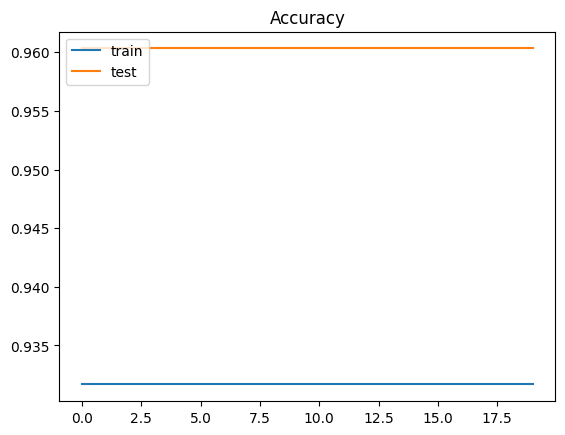

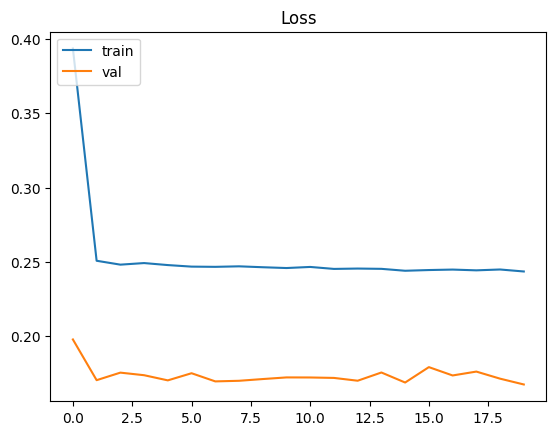

In [8]:
# 학습 상태를 그래프로 그리기 --- (*7)
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Oversampling

- Up sampling, Down Sampling
 - down sampling: 데이터 수를 줄이기
 - up sampling: 늘리기

In [74]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#파티셔닝 수행
from sklearn.model_selection import train_test_split
import numpy as np

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import recall_score

from imblearn.over_sampling import SMOTE

data = pd.read_csv("data.csv")
data.info()
data['Pass.Fail'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 49 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X20        1567 non-null   float64
 1   X86        1567 non-null   float64
 2   X87        1567 non-null   float64
 3   X88        1567 non-null   float64
 4   X113       1567 non-null   float64
 5   X115       1567 non-null   float64
 6   X116       1567 non-null   float64
 7   X117       1567 non-null   float64
 8   X119       1567 non-null   float64
 9   X120       1567 non-null   float64
 10  X156       1567 non-null   float64
 11  X221       1567 non-null   float64
 12  X222       1567 non-null   float64
 13  X223       1567 non-null   float64
 14  X248       1567 non-null   float64
 15  X250       1567 non-null   float64
 16  X251       1567 non-null   float64
 17  X252       1567 non-null   float64
 18  X254       1567 non-null   float64
 19  X255       1567 non-null   float64
 20  X291    

Pass.Fail
0    1463
1     104
Name: count, dtype: int64

In [75]:
data[~data.applymap(np.isreal).all(1)]
data = data.fillna(data.median())
data.describe().transpose()
data.groupby(["Pass.Fail"]).count()

,X20,X86,X87,X88,X113,X115,X116,X117,X119,X120,...,X526,X527,X570,X571,X572,X573,X574,X575,X576,X577
Pass.Fail,,,,,,,,,,,,,,,,,,,,,
0,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463,...,1463,1463,1463,1463,1463,1463,1463,1463,1463,1463
1,104,104,104,104,104,104,104,104,104,104,...,104,104,104,104,104,104,104,104,104,104


 - Up sampling

In [90]:
array = data.values
X = array[:,0:48] # select all rows and first 8 columns which are the attributes
Y = array[:,48]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
type(X_train)

#SMOTE for upsampling smaller cases
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before UpSampling, counts of label '1': 81
Before UpSampling, counts of label '0': 1015 



In [91]:
sm = SMOTE(sampling_strategy = 0.5 ,k_neighbors = 3, random_state=1)
#Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After UpSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))
print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After UpSampling, counts of label '1': 507
After UpSampling, counts of label '0': 1015 

After UpSampling, the shape of train_X: (1522, 48)
After UpSampling, the shape of train_y: (1522,) 



In [92]:
scaler = MinMaxScaler()
X_train = pd.DataFrame( scaler.fit_transform( X_train_res), columns = data.columns[0:48] )
X_test = pd.DataFrame( scaler.fit_transform( X_test), columns = data.columns[0:48] )

In [93]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train_res, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)


In [94]:
# 모델 정의하기 --- (*3)
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(48,)))
#model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=20,
    verbose=1,
    validation_split=0.1)


Epoch 1/20
43/43 [==============================] - 1s 8ms/step - loss: 0.6870 - accuracy: 0.6501 - val_loss: 0.7335 - val_accuracy: 0.0000e+00
Epoch 2/20
43/43 [==============================] - 0s 3ms/step - loss: 0.6610 - accuracy: 0.7414 - val_loss: 0.8418 - val_accuracy: 0.0000e+00
Epoch 3/20
43/43 [==============================] - 0s 3ms/step - loss: 0.5952 - accuracy: 0.7414 - val_loss: 1.3284 - val_accuracy: 0.0000e+00
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 0.5737 - accuracy: 0.7414 - val_loss: 1.4154 - val_accuracy: 0.0000e+00
Epoch 5/20
43/43 [==============================] - 0s 4ms/step - loss: 0.5716 - accuracy: 0.7414 - val_loss: 1.3229 - val_accuracy: 0.0000e+00
Epoch 6/20
43/43 [==============================] - 0s 4ms/step - loss: 0.5698 - accuracy: 0.7414 - val_loss: 1.3226 - val_accuracy: 0.0000e+00
Epoch 7/20
43/43 [==============================] - 0s 3ms/step - loss: 0.5692 - accuracy: 0.7414 - val_loss: 1.2709 - val_accuracy: 0.0

In [95]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


15/15 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.9512
정답률= 0.9511677026748657 loss= 0.2325087934732437


In [96]:
from sklearn.metrics import classification_report
import numpy as np
pred = np.argmax( model.predict( X_test), axis=1 )
y_test = np.argmax( y_test, axis=1 )
print( classification_report( y_test, pred ) )

15/15 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       448
           1       0.00      0.00      0.00        23

    accuracy                           0.95       471
   macro avg       0.48      0.50      0.49       471
weighted avg       0.90      0.95      0.93       471



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Tree model

In [97]:
array = data.values
X = array[:,0:48] # select all rows and first 8 columns which are the attributes
Y = array[:,48]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [98]:
sm = SMOTE(sampling_strategy = 0.5 ,k_neighbors = 3, random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [99]:
scaler = MinMaxScaler()
X_train = pd.DataFrame( scaler.fit_transform( X_train_res), columns = data.columns[0:48] )
X_test = pd.DataFrame( scaler.fit_transform( X_test), columns = data.columns[0:48] )

In [ ]:
!pip install xgboost

In [113]:
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

model = DecisionTreeClassifier()
model.fit( X_train, y_train_res)
print(model.score(X_test, y_test))

from sklearn.metrics import classification_report
print( classification_report( y_test, model.predict(X_test) ) )

0.7855626326963907
              precision    recall  f1-score   support

         0.0       0.96      0.81      0.88       448
         1.0       0.07      0.26      0.11        23

    accuracy                           0.79       471
   macro avg       0.51      0.54      0.49       471
weighted avg       0.91      0.79      0.84       471

